In [42]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [43]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

2.1.3
3.4.2


In [44]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation2 import get_model_for_problem_formulation, sum_over, sum_over_time

In [45]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(4)

In [46]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy

for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

In [47]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)
IntegerParameter('0_RfR 1', 0, 1, resolution=None, default=None, variable_name=['0_RfR 1'], pff=False)
IntegerParameter('0_RfR 2', 0, 1, resolution=None, default=None, variable_name=['0_RfR 2'], pff=False)
IntegerParameter('1_RfR 0', 0, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False)
IntegerParameter('1_RfR 1', 0, 1, resolution=None, default=None, variable_name=['1_RfR 1'], pff=False)
IntegerParameter('1_RfR 2', 0, 1, resolution=None, default=None, variable_name=['1_RfR 2'], pff=False)
IntegerParameter('2_RfR 0', 0, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False)
IntegerParameter('2_RfR 1', 0, 1, resolution=None, default=None, variable_name=['2_RfR 1'], pff=False)
IntegerParameter('2_RfR 2', 0, 1, resolution=None, default=None, variable_name=['2_RfR 2'], pff=False)
IntegerParameter('3_RfR 0', 0, 1, resolution=None, default=None, variable

In [48]:
# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('Expected Annual Damage', variable_name=('A.1_Expected Annual Damage', 'A.2_Expected Annual Damage', 'A.3_Expected Annual Damage', 'A.4_Expected Annual Damage', 'A.5_Expected Annual Damage'), function=<function sum_over at 0x122ae36a0>)
ScalarOutcome('RfR Total Costs', variable_name=('RfR Total Costs',), function=<function sum_over at 0x122ae36a0>)
ScalarOutcome('Dike Investment Costs', variable_name=('RfR Total Costs',), function=<function sum_over at 0x122ae36a0>)


In [49]:
# running the model through EMA workbench
with (MultiprocessingEvaluator(dike_model) as evaluator):
    results= evaluator.perform_experiments(scenarios=100, policies=275)

[MainProcess/INFO] pool started with 8 workers
[MainProcess/INFO] performing 100 scenarios * 275 policies * 1 model(s) = 27500 experiments
100%|████████████████████████████████████| 27500/27500 [17:35<00:00, 26.07it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [64]:
# observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['Expected Annual Damage', 'RfR Total Costs', 'Dike Investment Costs'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,77,316.974632,1.0,0.980268,301.263656,1.0,0.630832,257.618221,1.5,0.318394,...,6,5,6,3,4,1,3,850,575,dikesnet
1,98,49.027480,1.0,0.417407,253.026000,10.0,0.728410,283.784676,1.5,0.810960,...,6,5,6,3,4,1,3,851,575,dikesnet
2,13,95.654535,1.5,0.258603,273.202696,10.0,0.661678,109.675534,10.0,0.858289,...,6,5,6,3,4,1,3,852,575,dikesnet
3,30,121.315253,1.5,0.182422,302.958332,10.0,0.329761,303.433050,10.0,0.604211,...,6,5,6,3,4,1,3,853,575,dikesnet
4,40,319.527238,1.5,0.125212,164.655619,1.5,0.119462,37.691628,1.5,0.610609,...,6,5,6,3,4,1,3,854,575,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27495,115,201.886942,1.5,0.870114,270.963740,1.0,0.209037,67.443082,1.5,0.278408,...,9,7,1,5,9,1,1,945,849,dikesnet
27496,123,44.315580,10.0,0.567903,63.787900,1.5,0.978183,155.291294,1.0,0.915425,...,9,7,1,5,9,1,1,946,849,dikesnet
27497,2,242.351563,1.0,0.614782,234.032906,1.5,0.029254,160.733997,10.0,0.491912,...,9,7,1,5,9,1,1,947,849,dikesnet
27498,84,306.378082,1.0,0.276462,293.870747,10.0,0.396654,49.056425,10.0,0.440742,...,9,7,1,5,9,1,1,948,849,dikesnet


In [65]:
experiments.columns

Index(['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2', '0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'EWS_DaysToThreat', 'scenario', 'policy', 'model'],
      dtype='object')

In [66]:
# only works because we have scalar outcomes
outcomes_pd = pd.DataFrame(outcomes)
outcomes_pd

,Expected Annual Damage,RfR Total Costs,Dike Investment Costs
0,0.000000e+00,1.080100e+09,1.080100e+09
1,0.000000e+00,1.080100e+09,1.080100e+09
2,0.000000e+00,1.080100e+09,1.080100e+09
3,3.592389e+05,1.080100e+09,1.080100e+09
4,9.840547e+06,1.080100e+09,1.080100e+09
...,...,...,...
27495,0.000000e+00,1.244000e+09,1.244000e+09
27496,0.000000e+00,1.244000e+09,1.244000e+09
27497,3.088373e+06,1.244000e+09,1.244000e+09
27498,0.000000e+00,1.244000e+09,1.244000e+09


In [67]:
tot = experiments.join(outcomes_pd)
tot


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model,Expected Annual Damage,RfR Total Costs,Dike Investment Costs
0,77,316.974632,1.0,0.980268,301.263656,1.0,0.630832,257.618221,1.5,0.318394,...,3,4,1,3,850,575,dikesnet,0.000000e+00,1.080100e+09,1.080100e+09
1,98,49.027480,1.0,0.417407,253.026000,10.0,0.728410,283.784676,1.5,0.810960,...,3,4,1,3,851,575,dikesnet,0.000000e+00,1.080100e+09,1.080100e+09
2,13,95.654535,1.5,0.258603,273.202696,10.0,0.661678,109.675534,10.0,0.858289,...,3,4,1,3,852,575,dikesnet,0.000000e+00,1.080100e+09,1.080100e+09
3,30,121.315253,1.5,0.182422,302.958332,10.0,0.329761,303.433050,10.0,0.604211,...,3,4,1,3,853,575,dikesnet,3.592389e+05,1.080100e+09,1.080100e+09
4,40,319.527238,1.5,0.125212,164.655619,1.5,0.119462,37.691628,1.5,0.610609,...,3,4,1,3,854,575,dikesnet,9.840547e+06,1.080100e+09,1.080100e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27495,115,201.886942,1.5,0.870114,270.963740,1.0,0.209037,67.443082,1.5,0.278408,...,5,9,1,1,945,849,dikesnet,0.000000e+00,1.244000e+09,1.244000e+09
27496,123,44.315580,10.0,0.567903,63.787900,1.5,0.978183,155.291294,1.0,0.915425,...,5,9,1,1,946,849,dikesnet,0.000000e+00,1.244000e+09,1.244000e+09
27497,2,242.351563,1.0,0.614782,234.032906,1.5,0.029254,160.733997,10.0,0.491912,...,5,9,1,1,947,849,dikesnet,3.088373e+06,1.244000e+09,1.244000e+09
27498,84,306.378082,1.0,0.276462,293.870747,10.0,0.396654,49.056425,10.0,0.440742,...,5,9,1,1,948,849,dikesnet,0.000000e+00,1.244000e+09,1.244000e+09


[MainProcess/INFO] no time dimension found in results


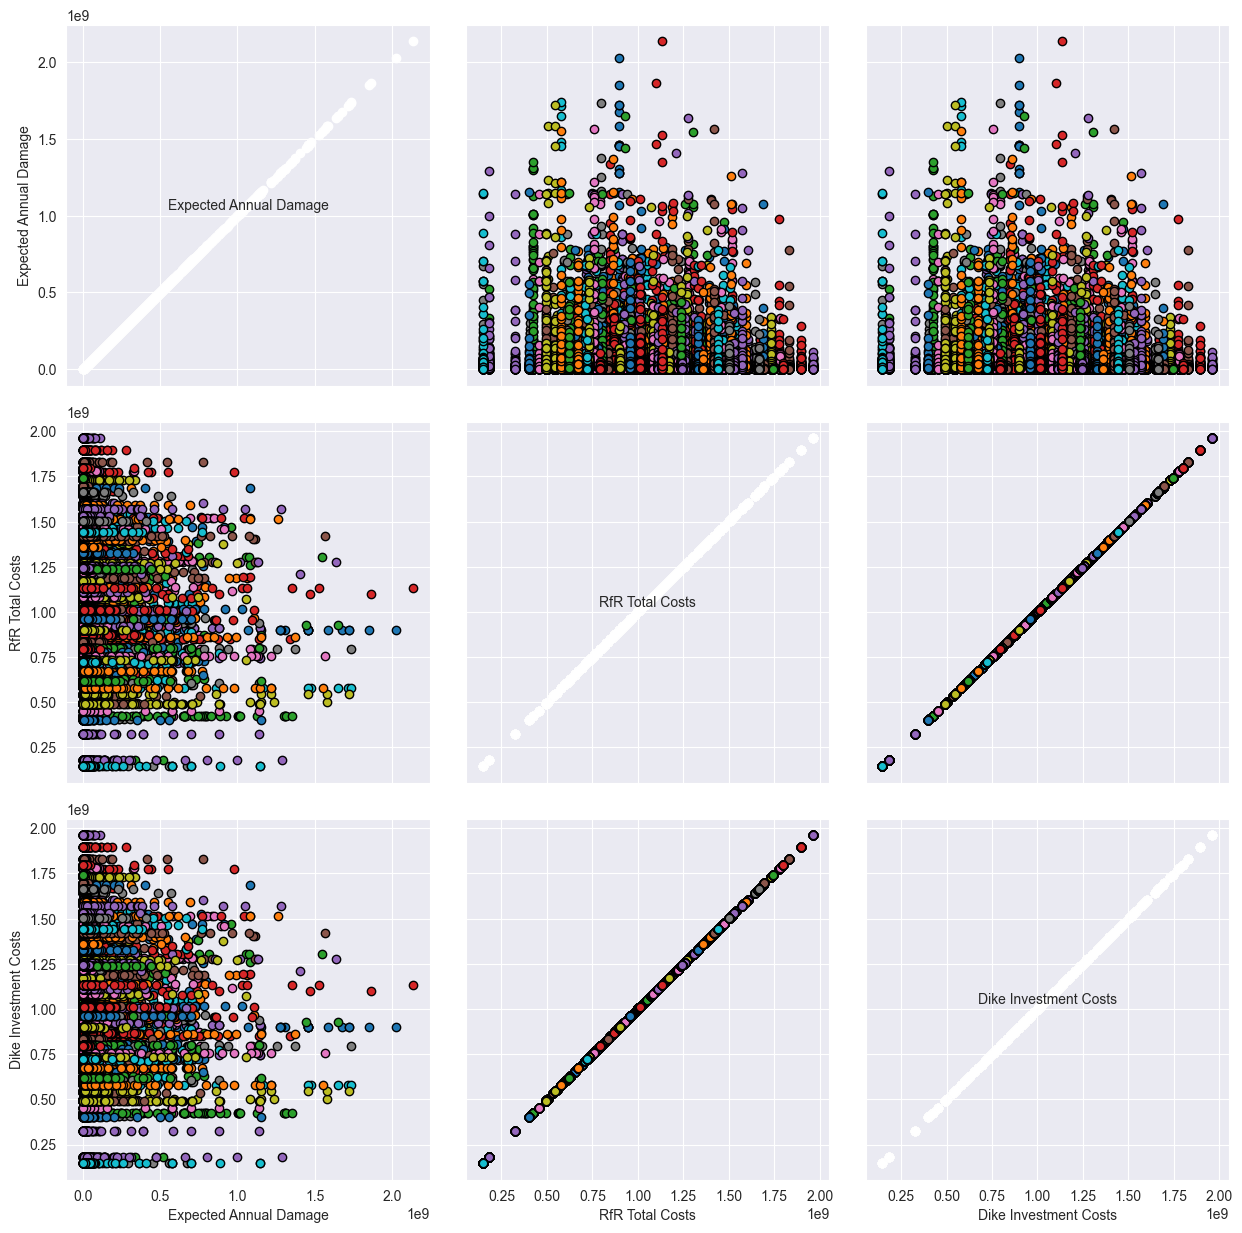

In [68]:
from ema_workbench.analysis import pairs_plotting

fig, axes = pairs_plotting.pairs_scatter(tot, outcomes, group_by='policy',legend=False)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

In [69]:
tot_policy = tot.groupby('policy').mean(numeric_only=True)
tot_policy.sort_values(by=tot_policy.columns[-1], ascending=True, inplace=True)
tot_policy

/var/folders/cq/_rbxzkq17533m5qdt1c__dyw0000gn/T/ipykernel_80539/255886294.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tot_policy = tot.groupby('policy').mean(numeric_only=True)


,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.2_Bmax,A.2_pfail,A.3_Bmax,A.3_pfail,A.4_Bmax,A.4_pfail,A.5_Bmax,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,Expected Annual Damage,RfR Total Costs,Dike Investment Costs
policy,,,,,,,,,,,,,,,,,,,,,
712,66.01,190.046165,0.500016,190.009687,0.500212,190.01136,0.499997,189.912663,0.500453,190.098141,...,5.0,10.0,3.0,4.0,8.0,10.0,1.0,4.925461e+07,1.460000e+08,1.460000e+08
824,66.01,190.046165,0.500016,190.009687,0.500212,190.01136,0.499997,189.912663,0.500453,190.098141,...,1.0,7.0,2.0,6.0,9.0,3.0,3.0,9.611319e+07,1.460000e+08,1.460000e+08
777,66.01,190.046165,0.500016,190.009687,0.500212,190.01136,0.499997,189.912663,0.500453,190.098141,...,6.0,10.0,10.0,6.0,9.0,5.0,0.0,2.673953e+07,1.826000e+08,1.826000e+08
779,66.01,190.046165,0.500016,190.009687,0.500212,190.01136,0.499997,189.912663,0.500453,190.098141,...,9.0,6.0,8.0,0.0,8.0,8.0,1.0,9.357222e+07,1.826000e+08,1.826000e+08
649,66.01,190.046165,0.500016,190.009687,0.500212,190.01136,0.499997,189.912663,0.500453,190.098141,...,2.0,6.0,0.0,2.0,7.0,4.0,0.0,6.226227e+07,3.270000e+08,3.270000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,66.01,190.046165,0.500016,190.009687,0.500212,190.01136,0.499997,189.912663,0.500453,190.098141,...,4.0,7.0,8.0,2.0,7.0,0.0,0.0,1.595692e+07,1.779400e+09,1.779400e+09
738,66.01,190.046165,0.500016,190.009687,0.500212,190.01136,0.499997,189.912663,0.500453,190.098141,...,6.0,6.0,2.0,8.0,7.0,4.0,1.0,6.013637e+06,1.798100e+09,1.798100e+09
700,66.01,190.046165,0.500016,190.009687,0.500212,190.01136,0.499997,189.912663,0.500453,190.098141,...,10.0,3.0,0.0,10.0,2.0,6.0,4.0,3.392301e+07,1.828800e+09,1.828800e+09


In [70]:
# code blok mean/max/min
# Zet de outcomes om naar een dataframe
outcomes_df = pd.DataFrame.from_dict(outcomes)

# Selecteer de juiste kolommen (kosten en schade)
columns = ["RfR Total Costs", "Expected Annual Damage"]

# Bereken mean, max, min
summary = outcomes_df[columns].agg(['mean', 'max', 'min'])

# Zet kosten om naar miljoenen euro (zoals in voorbeeldtabel)
summary.loc[:, "RfR Total Costs"] = summary["RfR Total Costs"] / 1e6
summary.loc[:, "Expected Annual Damage"] = summary["Expected Annual Damage"] / 1e6

# Rond af op 2 decimalen
summary = summary.round(2)

# Herbenoem de rijen voor helderheid
summary.index = ['Mean', 'Maximum', 'Minimum']
summary

,RfR Total Costs,Expected Annual Damage
Mean,1065.12,46.35
Maximum,1962.00,2136.70
Minimum,146.00,0.00


In [71]:
summary

,RfR Total Costs,Expected Annual Damage
Mean,1065.12,46.35
Maximum,1962.00,2136.70
Minimum,146.00,0.00


In [72]:
# # defining specific policies
# # for example, policy 1 is about extra protection in upper boundary
# # policy 2 is about extra protection in lower boundary
# # policy 3 is extra protection in random locations
#
#
# def get_do_nothing_dict():
#     return {l.name: 0 for l in dike_model.levers}
#
#
# policies = [
#     Policy(
#         "policy 1",
#         **dict(
#             get_do_nothing_dict(),
#             **{"0_RfR 0": 1, "0_RfR 1": 1, "0_RfR 2": 1, "A.1_DikeIncrease 0": 5}
#         )
#     ),
#     Policy(
#         "policy 2",
#         **dict(
#             get_do_nothing_dict(),
#             **{"4_RfR 0": 1, "4_RfR 1": 1, "4_RfR 2": 1, "A.5_DikeIncrease 0": 5}
#         )
#     ),
#     Policy(
#         "policy 3",
#         **dict(
#             get_do_nothing_dict(),
#             **{"1_RfR 0": 1, "2_RfR 1": 1, "3_RfR 2": 1, "A.3_DikeIncrease 0": 5}
#         )
#     ),
# ]

In [73]:
# # pass the policies list to EMA workbench experiment runs
# n_scenarios = 100
# with MultiprocessingEvaluator(dike_model) as evaluator:
#     results = evaluator.perform_experiments(n_scenarios, policies)

In [74]:
# experiments, outcomes = results

In [75]:
# only works because we have scalar outcomes
# pd.DataFrame(outcomes)

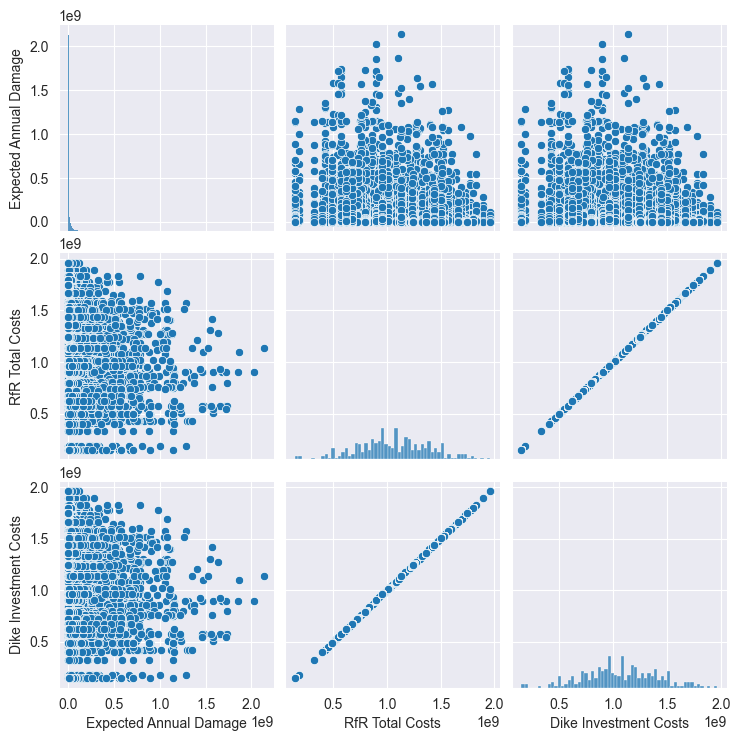

In [76]:
sns.pairplot(pd.DataFrame.from_dict(outcomes))
plt.show()

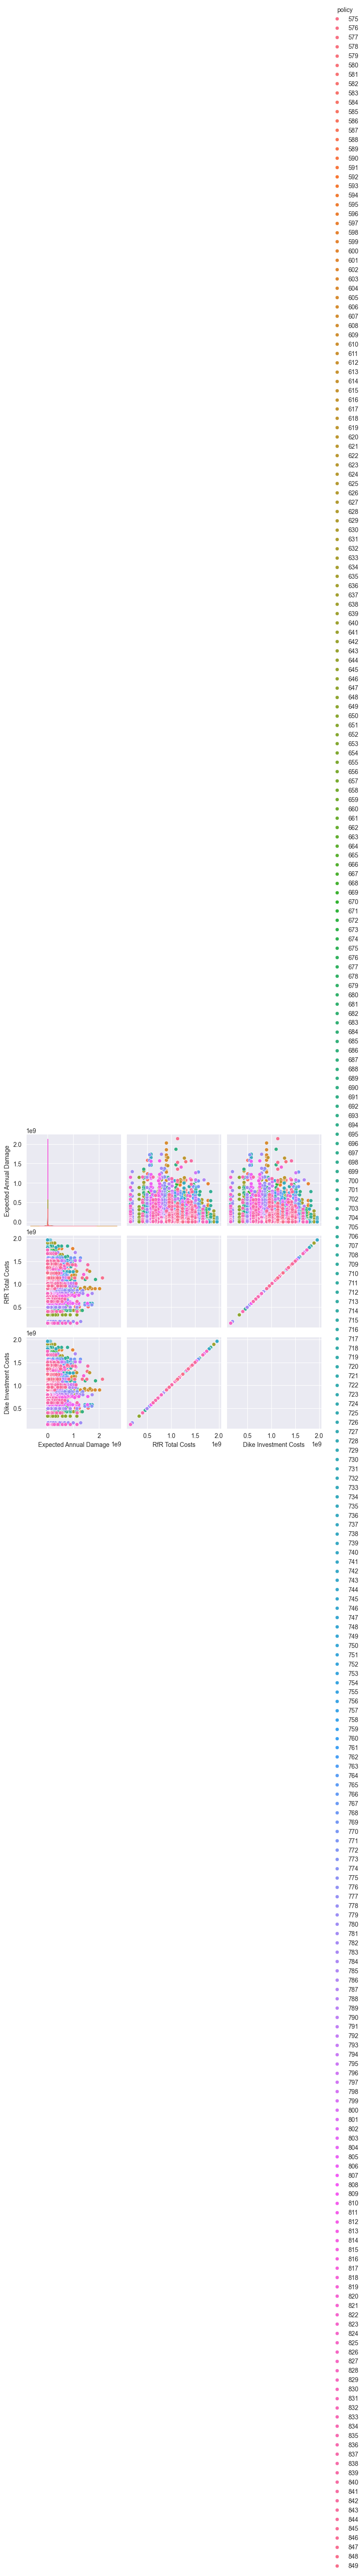

In [77]:
policies = experiments['policy']

data = pd.DataFrame.from_dict(outcomes)
data['policy'] = policies

sns.pairplot(data, hue='policy',  vars=outcomes.keys(), )
plt.show()

In [1]:
from ema_workbench import save_results


save_results(results, 'dike_open_exploration_results_Overijssel.tar.gz')

NameError: name 'results' is not defined